# Proyek Analisis Data: Nama dataset
- Kelompok :
- Anggota : </br>
10122266 - ardi fajar arifin</br>
10122271 - gari baldi <br>
10122243 - iwana rizkan <br>
10122272 - andika tri nugroho <br>
10122251 - aurindra maulidzar <br>
10122268 - arif rizky

## Menentukan Pertanyaan Bisnis

- Apakah terdapat perbedaan dalam jumlah penyewa sepeda antara musim panas, musim gugur, musim dingin, dan musim semi? (10122271 - gari baldi) 
- Bagaimana cuaca mempengaruhi jumlah penyewa sepeda ? (10122272 - andika tri nugroho )
- Apakah ada perbedaan  dalam pola penyewaan antara hari kerja dan akhir pekan ? (10122268 - arif rizky)
- jam berapakah banyaknya penyewa ? (10122243 - iwana rizkan)
- apakah tiap tahun mengalami kenaikan jumlah penyewa ? (10122251 - aurindra maulidzar)
- apakah tiap bulan mengalami kenaikan jumlah penyewa ? (10122266 - ardi fajar arifin)

## Menyaipkan semua library yang dibuthkan

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

2024-02-17 09:42:38.572090: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Data Wrangling

### Gathering Data

In [4]:
dataBike = pd.read_csv('./Bike-sharing-dataset/day.csv')
dataBikeHour = pd.read_csv('./Bike-sharing-dataset/hour.csv')


### Assessing Data

#### data 5 teratas

In [5]:
display(dataBike.head())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### info data

In [6]:
display(dataBikeHour.head())

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [7]:
display(dataBike.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


None

In [8]:
display(dataBikeHour.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


None

#### statistik deskriktif dalam numerik

In [9]:
display(dataBike.describe())

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
display(dataBikeHour.describe())

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### data null

In [11]:
print(dataBike.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [12]:
print(dataBikeHour.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


#### data duplicate

In [13]:
print('Data Duplicate : ',dataBike.duplicated().sum())

Data Duplicate :  0


In [14]:
print('Data Duplicate : ',dataBikeHour.duplicated().sum())

Data Duplicate :  0


### Cleaning Data

### karena tidak ada yang kosong dan tidak ada yang duplicate jadi tidak perlu di cleaning data lagi

## Exploratory Data Analysis (EDA)

### Explore ...

#### menambahkan kolom baru

In [15]:
dataBike['dteday'] = pd.to_datetime(dataBike['dteday']) # mengubah dteday menjadi datetime
dataBike['bulan'] = dataBike['dteday'].dt.to_period('M') # menambahkan kolom bulan
dataBike['Hari'] = dataBike['dteday'].dt.day_name() # menambah kolom hari dengan nama harinya
dataBike['Tipe Hari'] = dataBike['Hari'].apply(lambda x : 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday') # menambah kolom tipe hari weekday / weekend
dataBikeHour['jam'] = dataBikeHour['hr'].apply(lambda x : f"{x:02d}:00") # menambah kolom jam 
dataBike['tahun']= dataBike['dteday'].dt.year # menambah kolom tahun
dataBike['musim'] = dataBike['season'].map({1: 'Musim Semi', 2: 'Musim Panas', 3: 'Musim Gugur', 4: 'Musim Dingin'})

#### mengelompokan bulan dan jumlahnya penyewa (musim)

In [16]:
dataPerbulanMusim = dataBike.groupby(['bulan', 'musim'])['cnt'].mean()
dataPerbulanMusim = dataPerbulanMusim.ffill()

#### mengelompokan bulan dan jumlahnya penyewa (Cuaca)

In [17]:
dataPerbulanCuaca = dataBike.groupby(['bulan', 'weathersit'])['cnt'].mean()
dataPerbulanCuaca = dataPerbulanCuaca.ffill()

#### mengelompokan tahun dan jumlahnya penyewa

In [18]:
dataPertahun = dataBike.groupby('tahun')['cnt'].sum()

#### mengelompokan jam dan jumlahnya penyewa

In [19]:
dataHour = dataBikeHour.groupby('jam')['cnt'].mean()

#### mengelompokan musim dan jumlahnya penyewa
- melakukan sort dari terkecil ke terbanyak

In [20]:
dataMusim = dataBike.groupby('musim')['cnt'].mean().sort_values()

#### mengambil data cuaca permusim

In [21]:
dataMusimSemi = dataBike[dataBike['musim'] == 'Musim Semi']
jumlahCuacaMusimSemi = dataMusimSemi.groupby('weathersit')['cnt'].mean()



dataMusimDingin = dataBike[dataBike['musim'] == 'Musim Dingin']
jumlahCuacaMusimDingin = dataMusimDingin.groupby('weathersit')['cnt'].mean()

dataMusimPanas = dataBike[dataBike['musim'] == 'Musim Panas']
jumlahCuacaMusimPanas = dataMusimPanas.groupby('weathersit')['cnt'].mean()

dataMusimGugur = dataBike[dataBike['musim'] == 'Musim Gugur']
jumlahCuacaMusimGugur = dataMusimGugur.groupby('weathersit')['cnt'].mean()

for i in range(1,5):
    if i not in jumlahCuacaMusimSemi.index:
        jumlahCuacaMusimSemi[i] = 0
    if i not in jumlahCuacaMusimDingin.index:
        jumlahCuacaMusimDingin[i] = 0
    if i not in jumlahCuacaMusimPanas.index:
        jumlahCuacaMusimPanas[i] = 0
    if i not in jumlahCuacaMusimGugur.index:
        jumlahCuacaMusimGugur[i] = 0

#### mengelompokan hari dan jumlahnya penyewa

In [22]:
dataPerHari = dataBike.groupby('Hari')['cnt'].mean()

#### mengelompokan tipe hari (weekday / weekend) dan jumlahnya penyewa

In [30]:
dataTipeHari = dataBike.groupby('Tipe Hari')['cnt'].mean()

# Analisis Machine Learning

In [28]:
display(dataBikeHour[["dteday", "season", "weathersit", "jam"]])

,dteday,season,weathersit,jam
0,2011-01-01,1,1,00:00
1,2011-01-01,1,1,01:00
2,2011-01-01,1,1,02:00
3,2011-01-01,1,1,03:00
4,2011-01-01,1,1,04:00
...,...,...,...,...
17374,2012-12-31,1,2,19:00
17375,2012-12-31,1,2,20:00
17376,2012-12-31,1,1,21:00
17377,2012-12-31,1,1,22:00


In [39]:
dataBikeHour['dteday'] = pd.to_datetime(dataBikeHour['dteday']).dt.dayofweek 
dataBikeHour['jam'] = pd.to_datetime(dataBikeHour['jam']).dt.hour 

/var/folders/1q/ttq7y9792hl1j72br9_w4vzw0000gn/T/ipykernel_31885/3193492255.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataBikeHour['jam'] = pd.to_datetime(dataBikeHour['jam']).dt.hour


In [40]:
X = dataBikeHour[['dteday', 'season', 'weathersit', 'jam']]
y = dataBikeHour['cnt']

In [41]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Normalisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [44]:
model.compile(optimizer='adam', loss='mse')

In [45]:
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
348/348 [==============================] - 2s 3ms/step - loss: 50821.7188 - val_loss: 29008.8438
Epoch 2/50
348/348 [==============================] - 1s 2ms/step - loss: 27379.8691 - val_loss: 27833.0508
Epoch 3/50
348/348 [==============================] - 1s 2ms/step - loss: 26558.1758 - val_loss: 27050.9160
Epoch 4/50
348/348 [==============================] - 1s 2ms/step - loss: 25701.1387 - val_loss: 25956.9102
Epoch 5/50
348/348 [==============================] - 1s 2ms/step - loss: 24427.8281 - val_loss: 24630.9277
Epoch 6/50
348/348 [==============================] - 1s 2ms/step - loss: 23075.4043 - val_loss: 23133.5078
Epoch 7/50
348/348 [==============================] - 1s 2ms/step - loss: 21880.1367 - val_loss: 22013.7891
Epoch 8/50
348/348 [==============================] - 1s 2ms/step - loss: 20976.0801 - val_loss: 21253.3125
Epoch 9/50
348/348 [==============================] - 1s 2ms/step - loss: 20372.4062 - val_loss: 20794.0898
Epoch 10/50
348/348 [=======

In [46]:
# Simpan model
model.save("rental_sepeda_model")

INFO:tensorflow:Assets written to: rental_sepeda_model/assets


INFO:tensorflow:Assets written to: rental_sepeda_model/assets


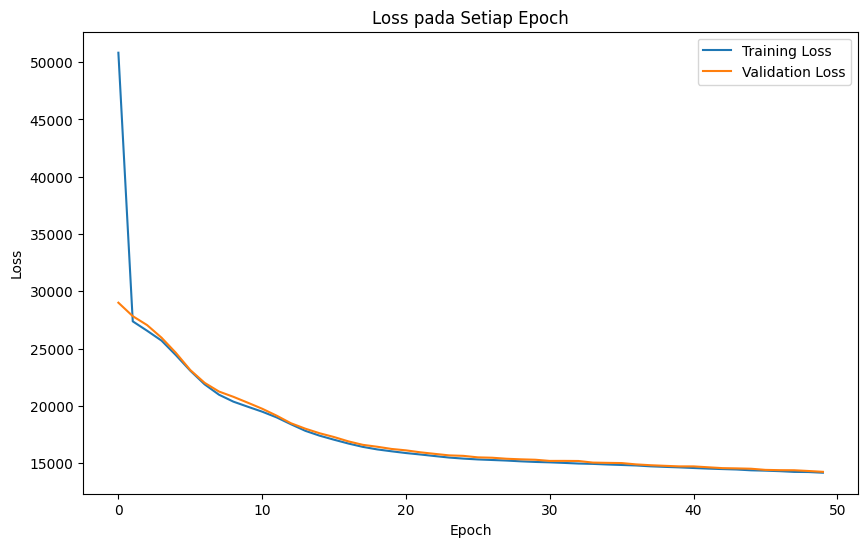

In [47]:
# Visualisasi loss pada setiap epoch
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss pada Setiap Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

109/109 [==============================] - 0s 2ms/step


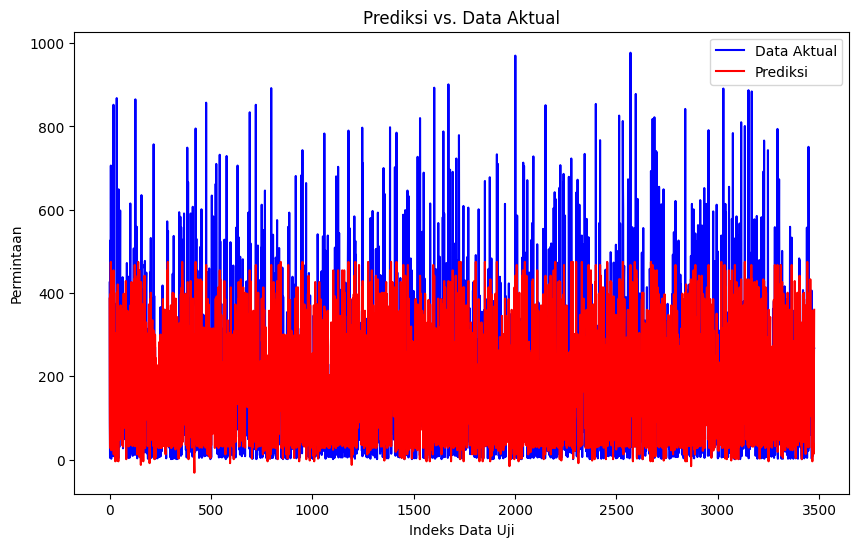

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Load model yang sudah disimpan
model = tf.keras.models.load_model("rental_sepeda_model")

# Melakukan prediksi pada data uji
predictions = model.predict(X_test_scaled)

# Visualisasi prediksi vs. data aktual
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Data Aktual', color='blue')
plt.plot(predictions, label='Prediksi', color='red')
plt.title('Prediksi vs. Data Aktual')
plt.xlabel('Indeks Data Uji')
plt.ylabel('Permintaan')
plt.legend()
plt.show()

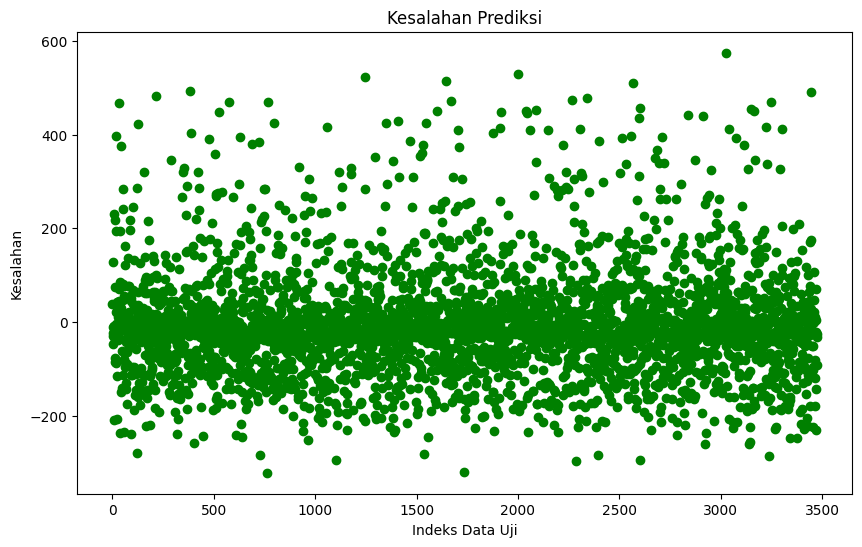

In [51]:
# Visualisasi kesalahan prediksi
plt.figure(figsize=(10, 6))
errors = y_test.values - predictions.squeeze()
plt.plot(errors, marker='o', linestyle='', color='green')
plt.title('Kesalahan Prediksi')
plt.xlabel('Indeks Data Uji')
plt.ylabel('Kesalahan')
plt.show()

In [52]:
# Visualisasi prediksi terhadap jam
plt.figure(figsize=(10, 6))
plt.scatter(X_test['jam'], y_test.values, label='Data Aktual', color='blue')
plt.scatter(X_test['jam'], predictions, label='Prediksi', color='red')
plt.title('Prediksi vs. Data Aktual Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Permintaan')
plt.legend()
plt.show()

KeyError: 'Jam'

<Figure size 1000x600 with 0 Axes>